Dataset --> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
#Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.missing_data_imputers import RandomSampleImputer,CategoricalVariableImputer
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder,OneHotCategoricalEncoder
from feature_engine.variable_transformers import PowerTransformer, YeoJohnsonTransformer
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#Load the data
data = pd.read_csv('train.csv')

In [3]:
#Read the data 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Getting the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Analysis

In [5]:
#Analyse the missing value
missing_col = [col for col in data.columns if data[col].isnull().sum()>0]

In [6]:
missing_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
missing=data[missing_col].isnull().mean()

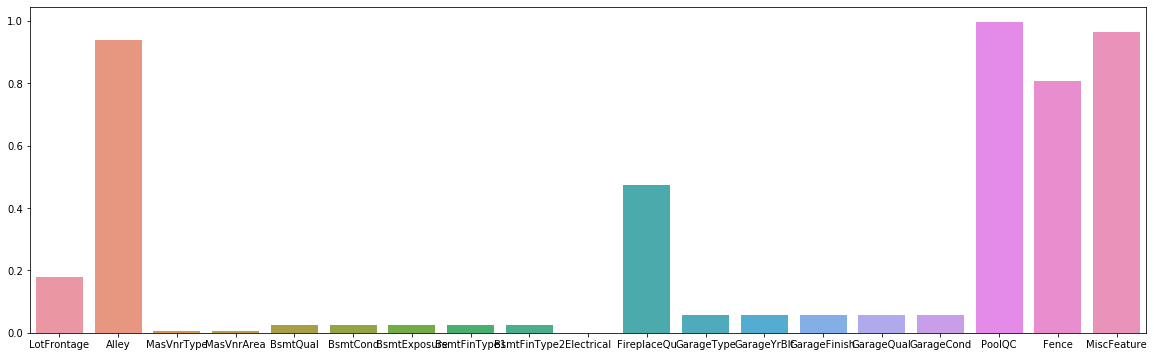

In [8]:
#Plot the missing data
plt.figure(figsize=(20,6))
sns.barplot(x = missing.index, y = missing.values)

In [9]:
#Analyse the missing values w.r.t target
def analayse_na(df,var):
    
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    
    plt.title(var)
    plt.show()

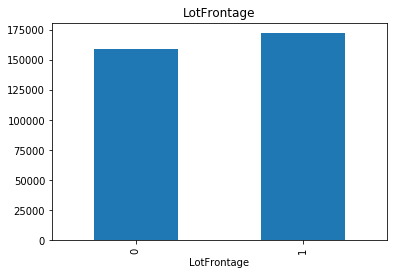

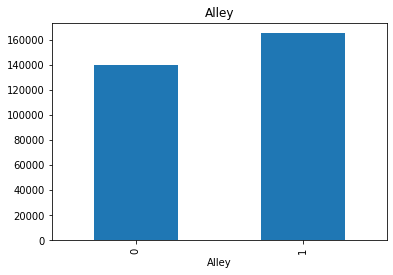

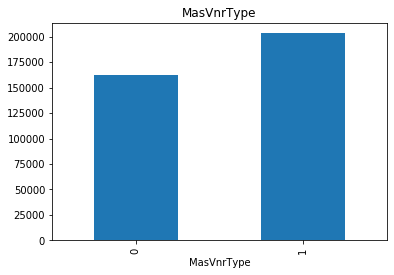

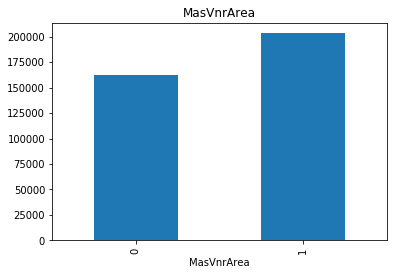

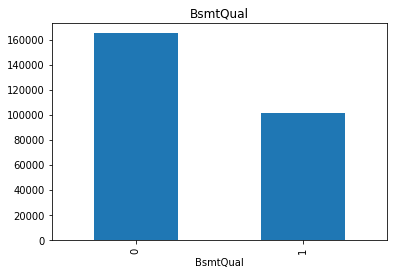

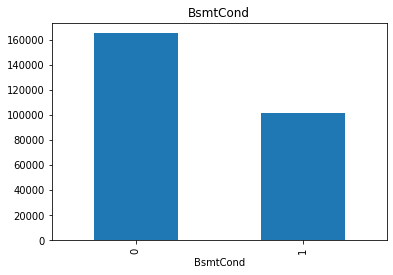

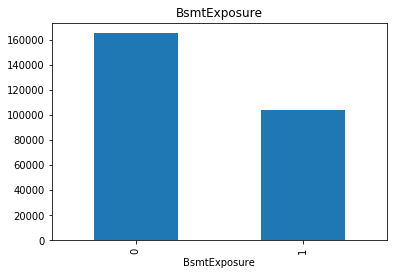

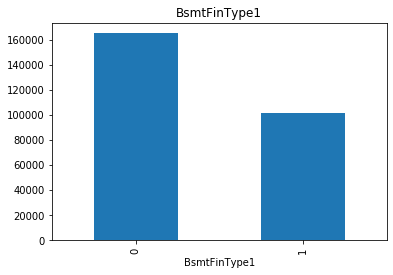

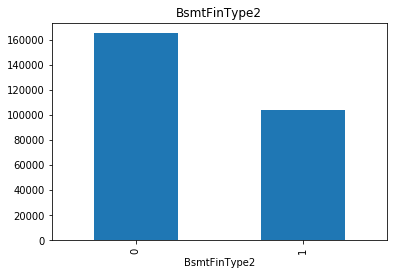

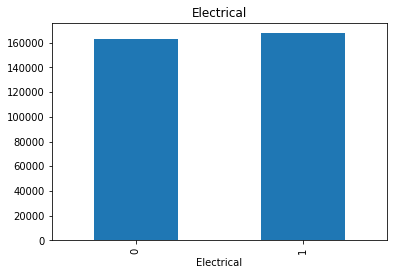

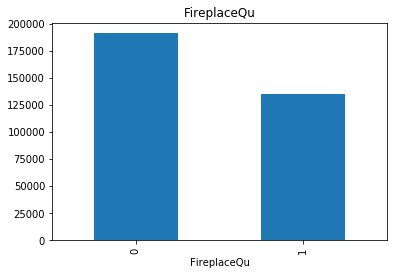

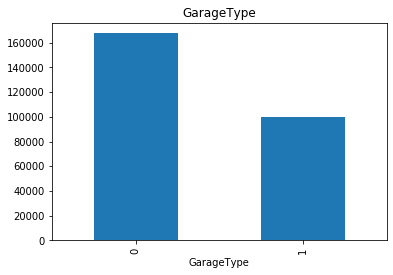

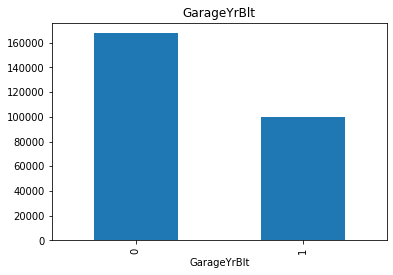

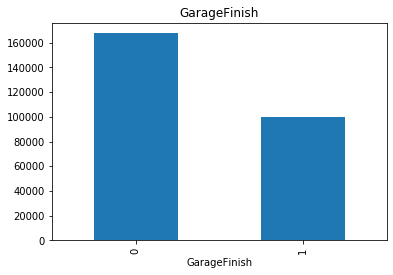

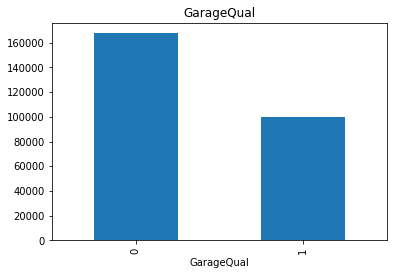

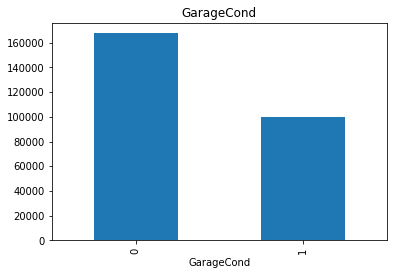

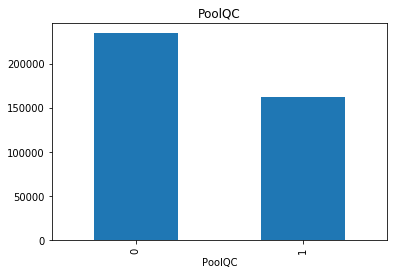

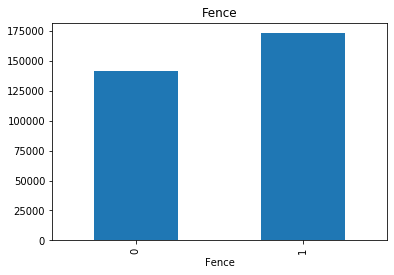

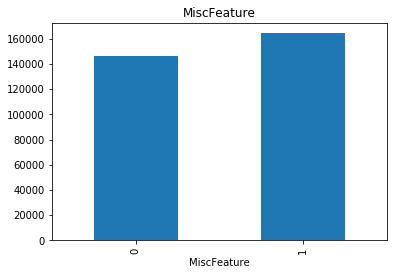

In [10]:
for var in missing_col:
    analayse_na(data,var)

In [11]:
#Numerical variable in dataset
num_vars = [col for col in data.columns if data[col].dtypes != 'O' and col not in 'Id']

In [12]:
num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
#Diagonastic plot to analyse the data
def analyse_dist(df, var):
    
    data[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()   

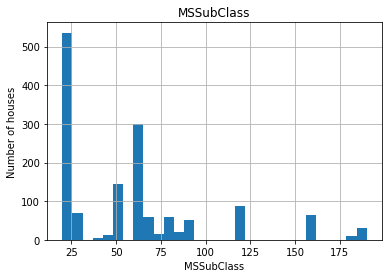

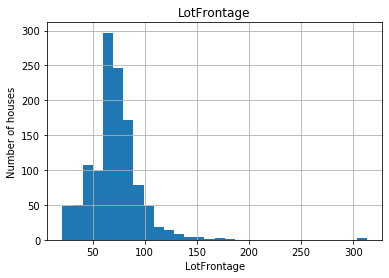

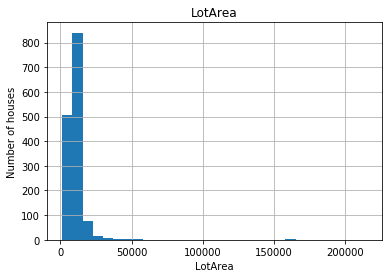

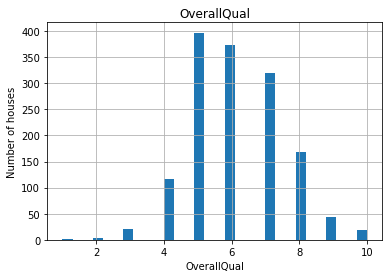

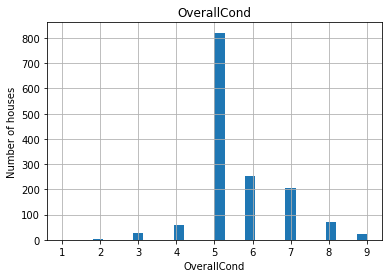

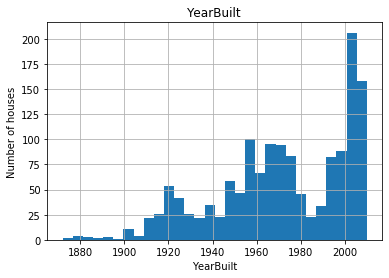

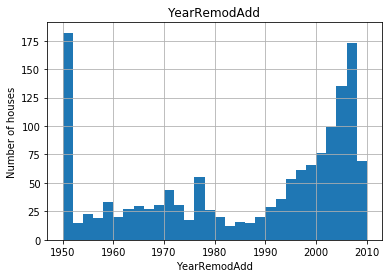

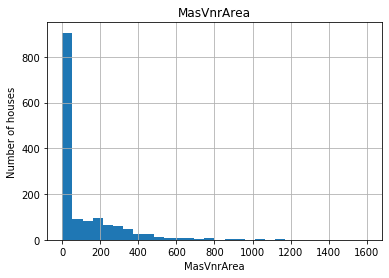

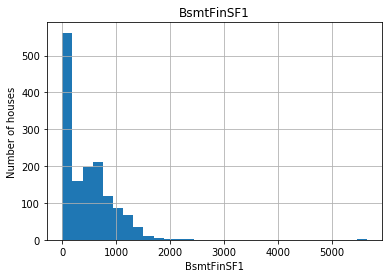

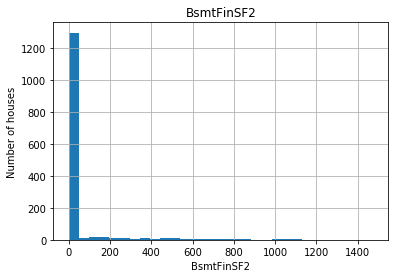

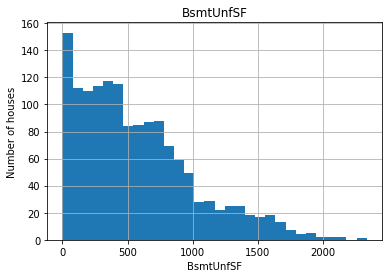

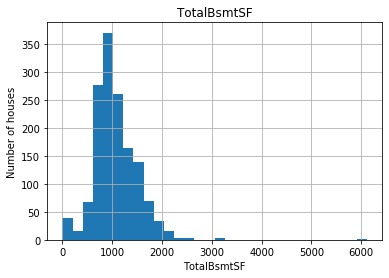

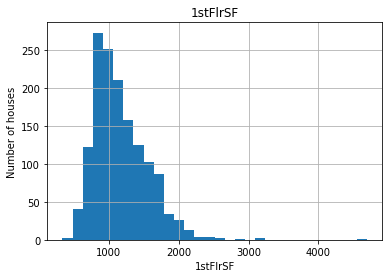

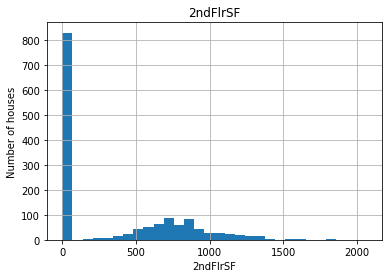

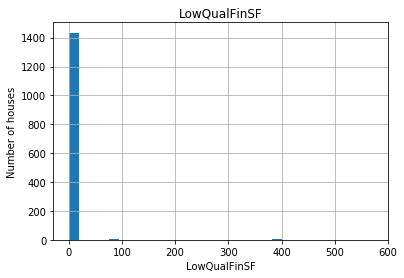

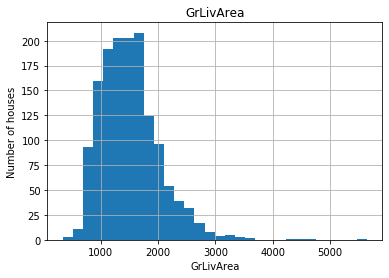

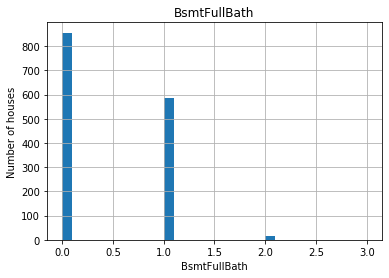

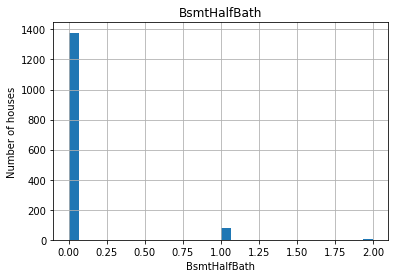

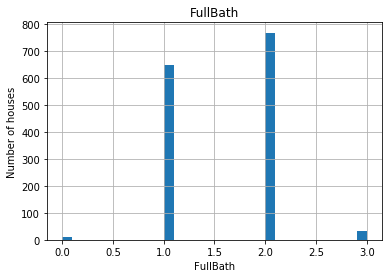

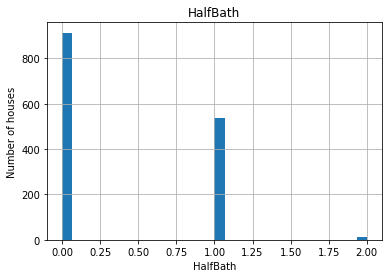

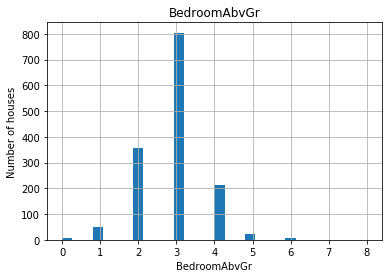

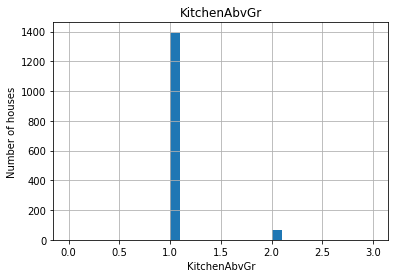

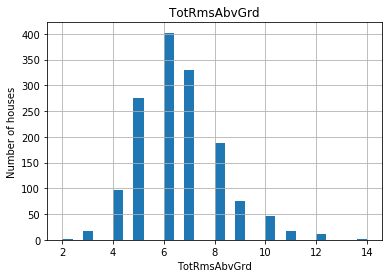

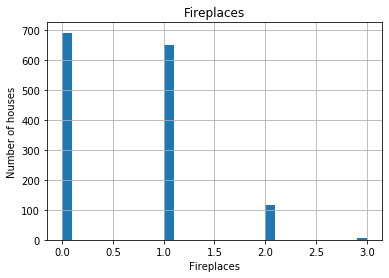

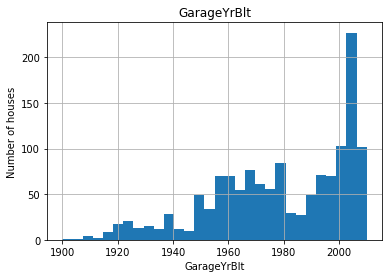

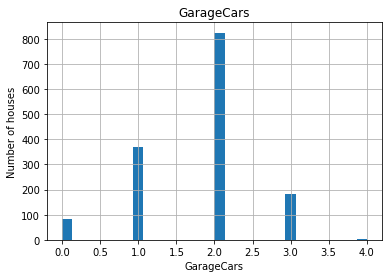

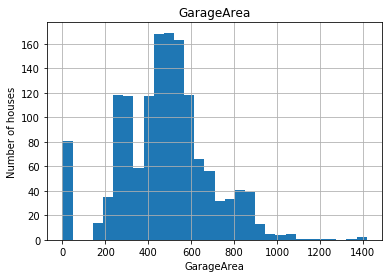

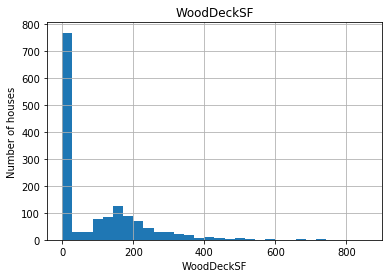

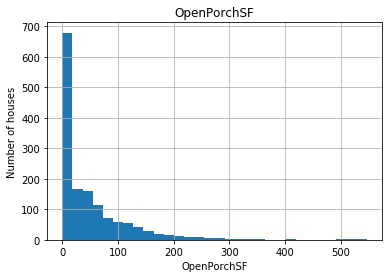

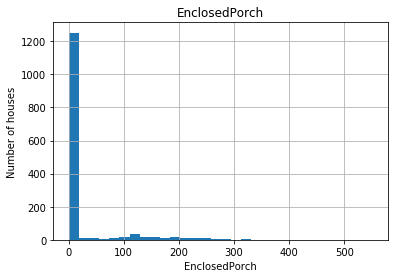

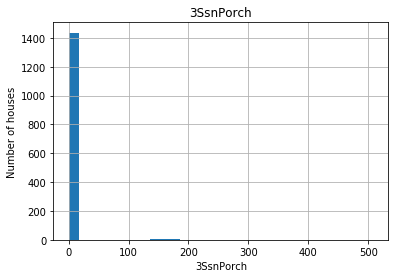

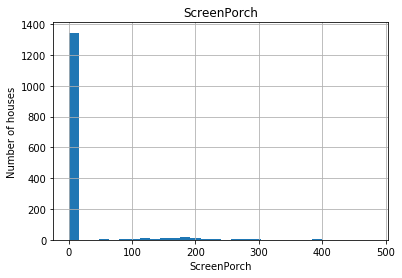

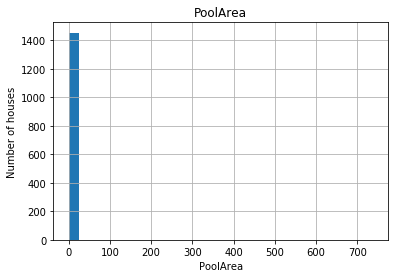

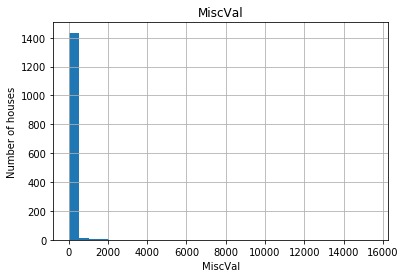

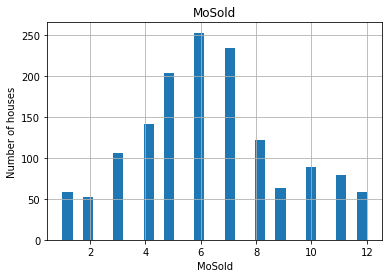

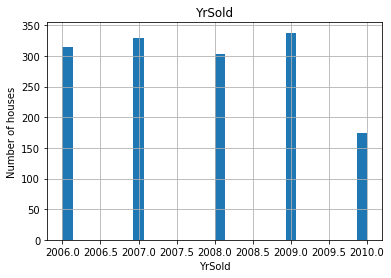

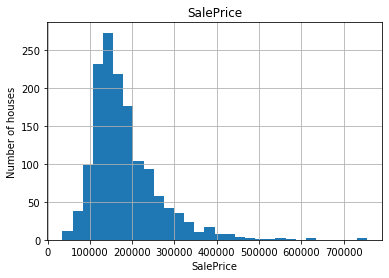

In [14]:
for var in num_vars:
    analyse_dist(data, var)

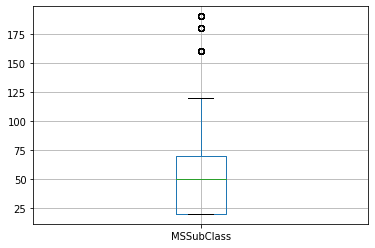

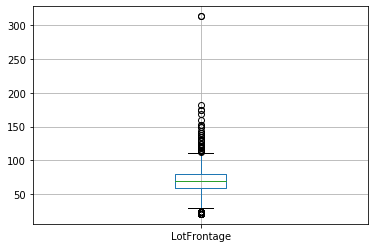

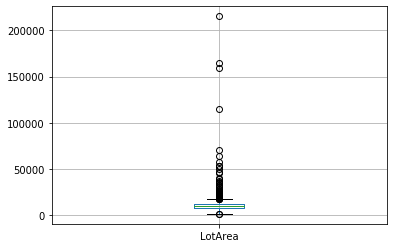

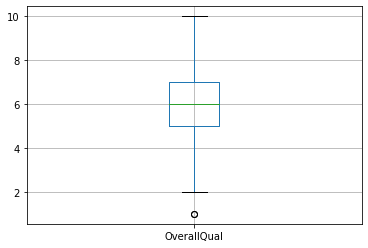

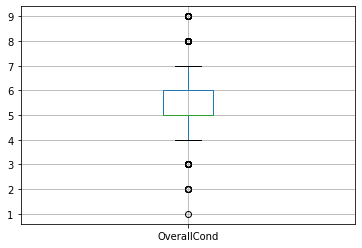

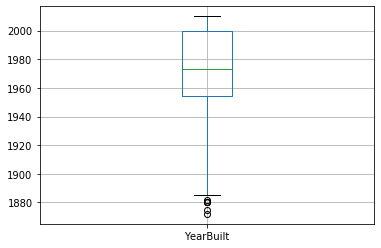

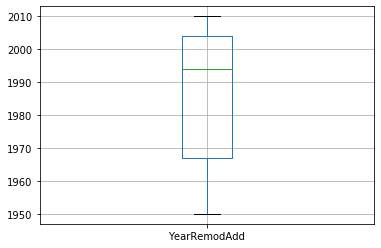

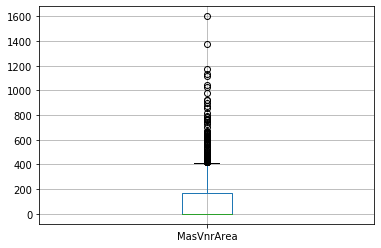

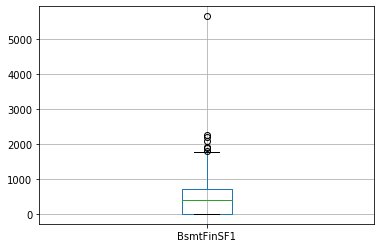

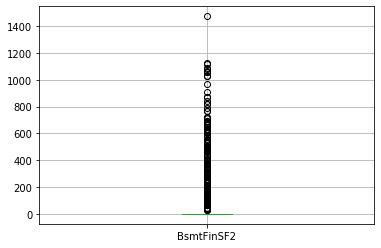

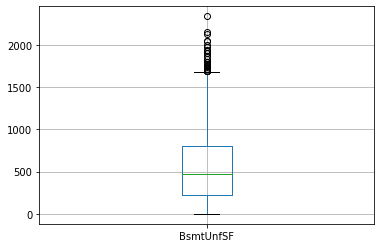

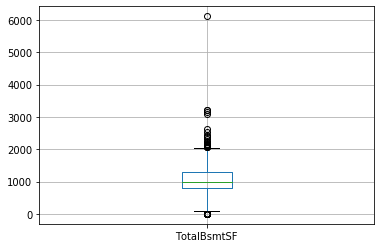

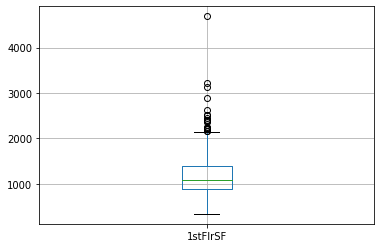

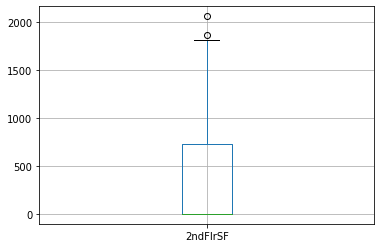

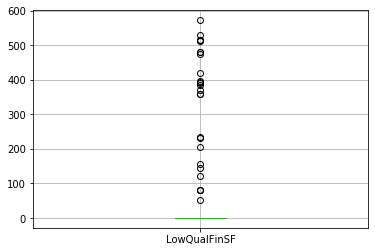

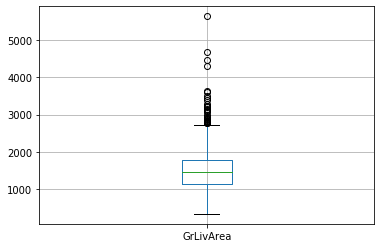

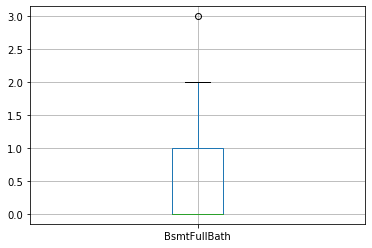

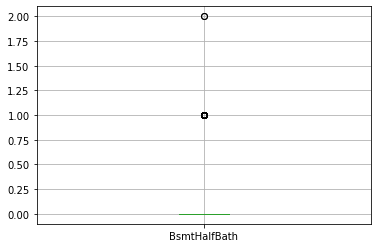

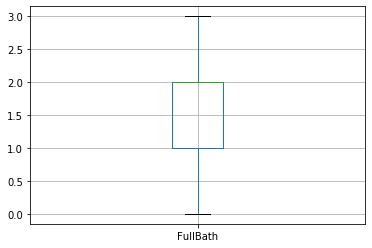

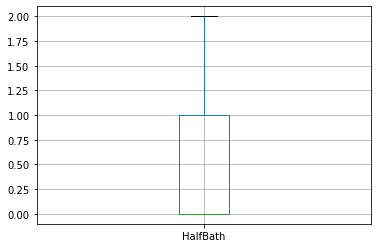

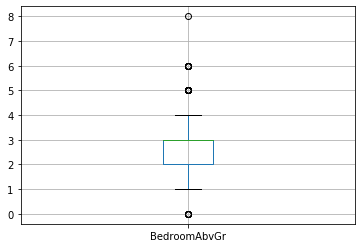

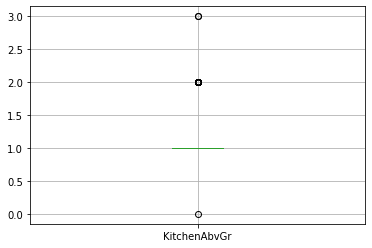

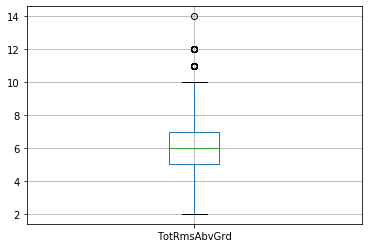

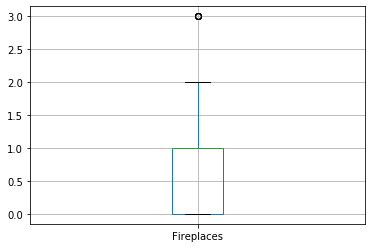

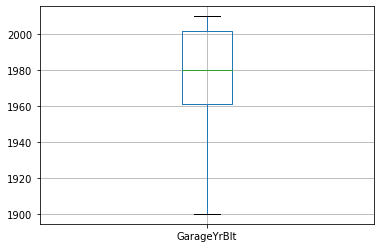

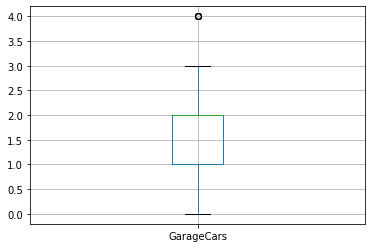

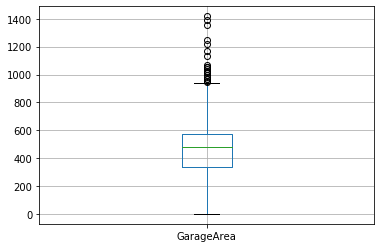

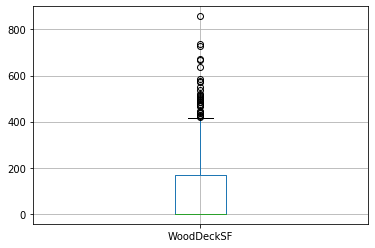

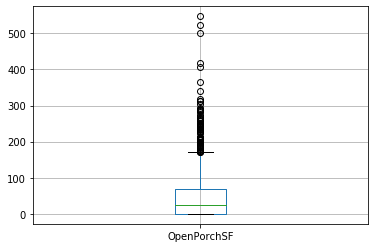

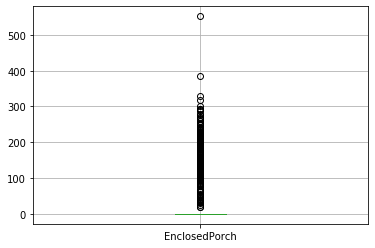

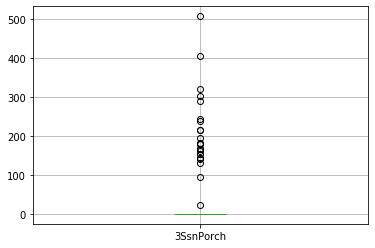

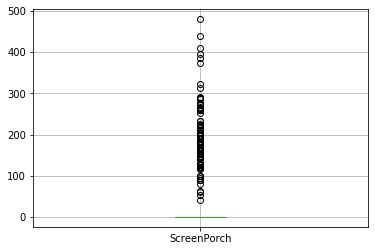

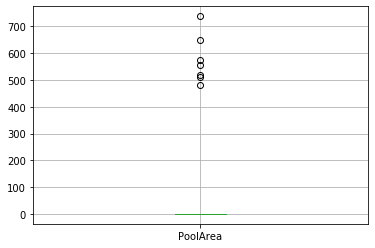

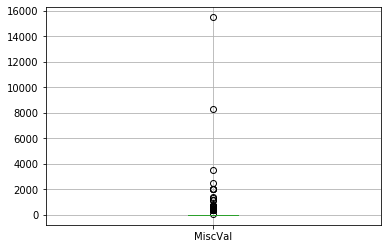

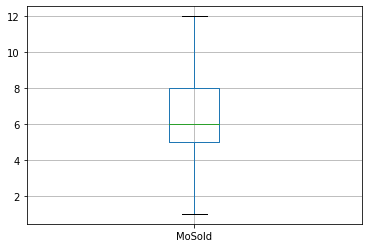

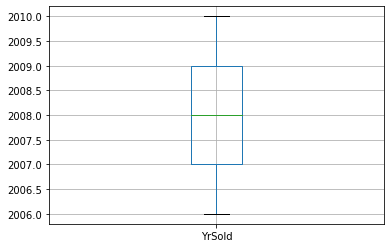

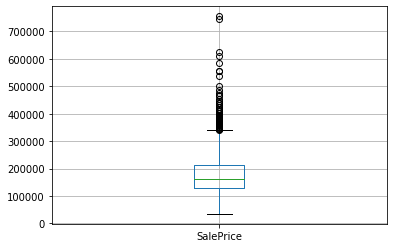

In [15]:
for var in num_vars:
    data.boxplot(column=var)
    plt.show()

In [16]:
#Categorical variable in dataset
cat_vars = [col for col in data.columns if data[col].dtypes == 'O']

In [17]:
cat_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
#Analysing the cardinality of the categorical variable
def nunique_category(df, var):
    
    df[var].value_counts()
    df[var].value_counts().plot.bar()
    plt.xlabel(var)
    plt.ylabel('Number Counts')
    plt.show()

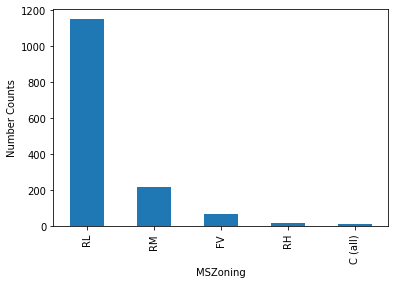

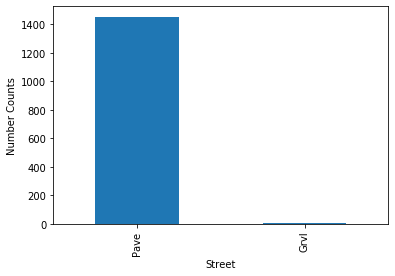

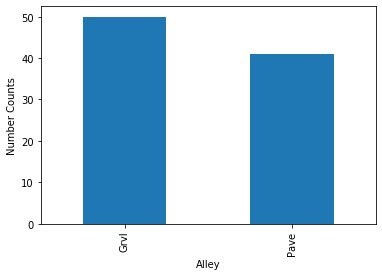

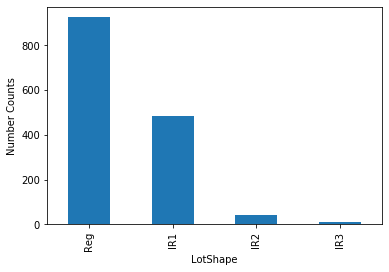

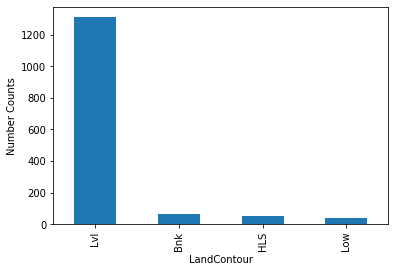

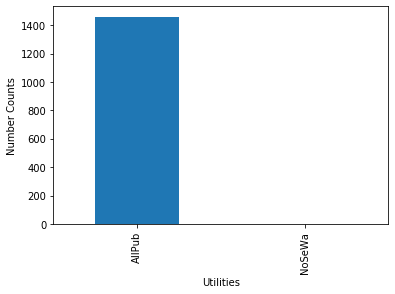

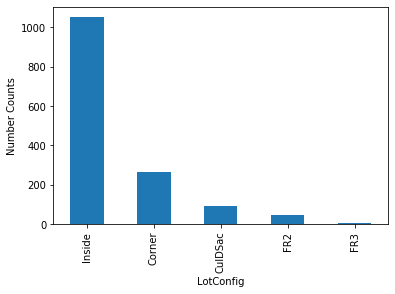

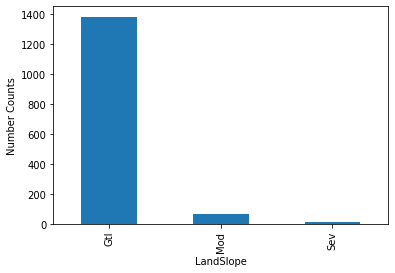

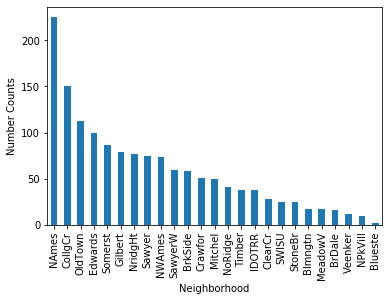

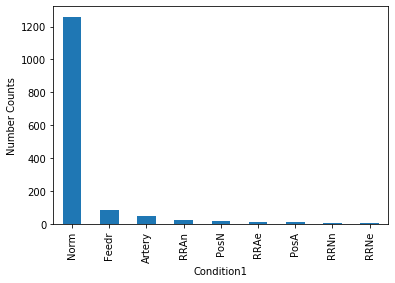

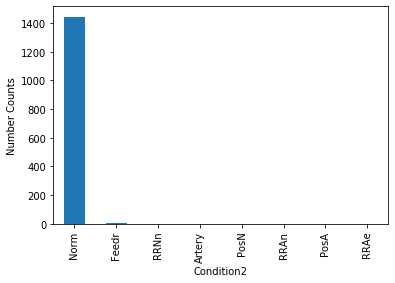

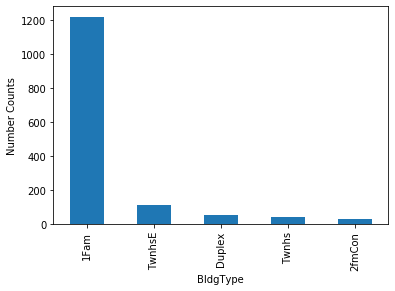

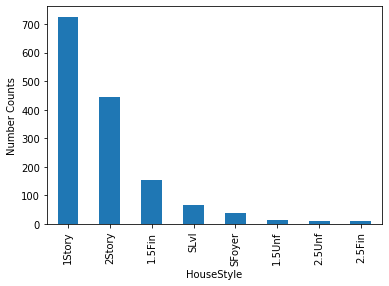

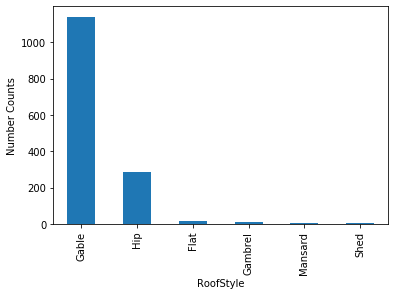

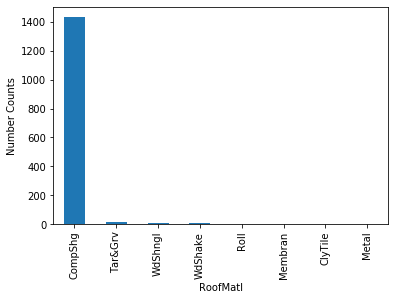

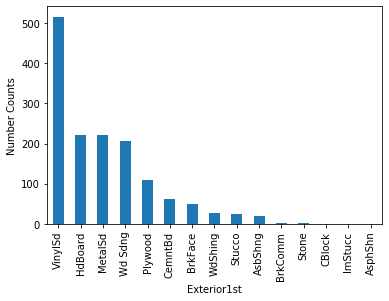

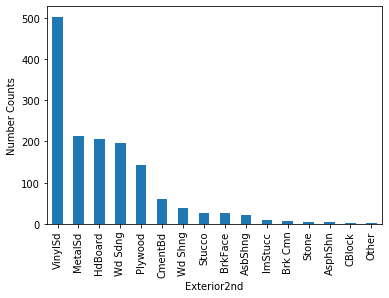

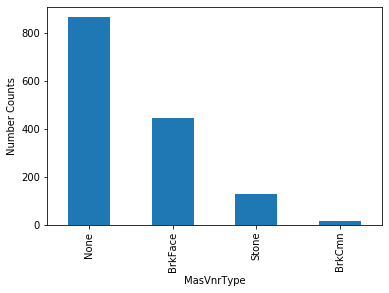

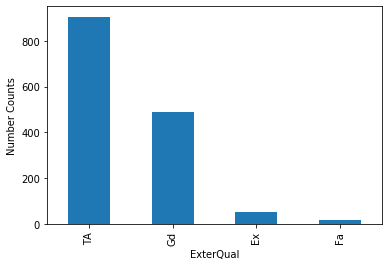

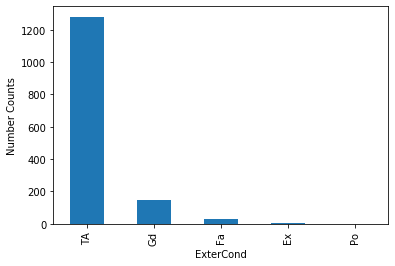

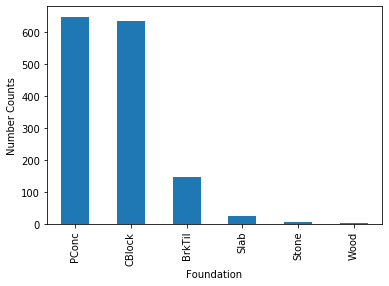

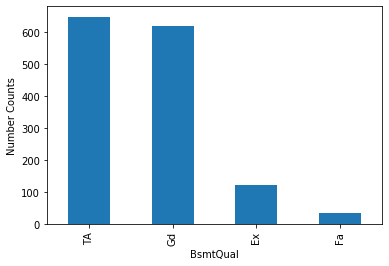

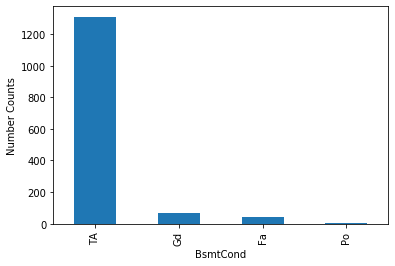

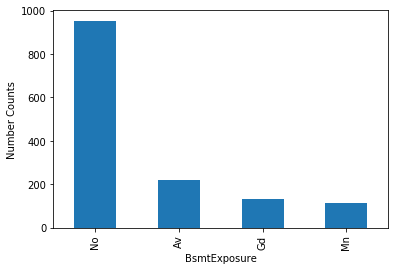

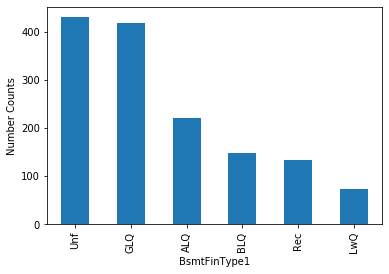

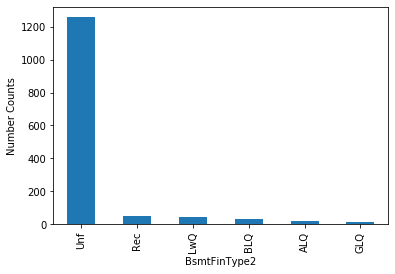

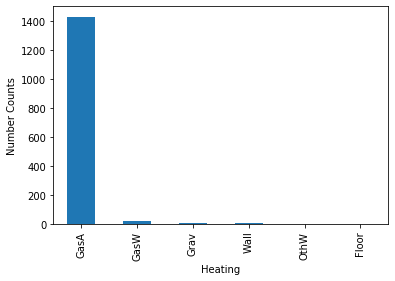

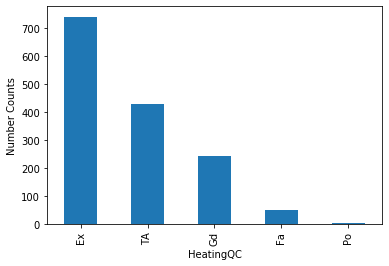

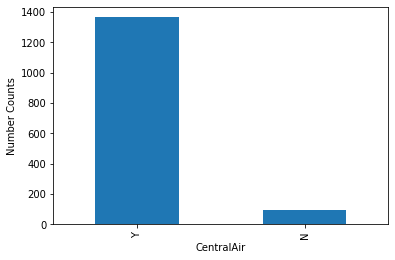

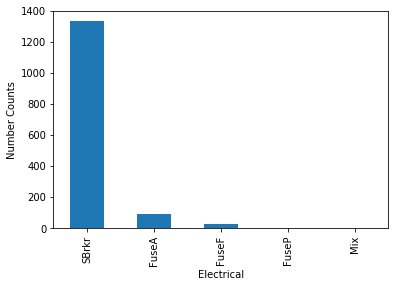

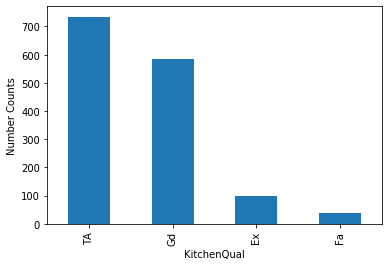

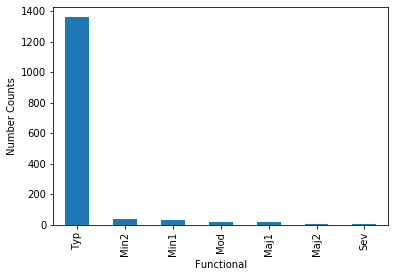

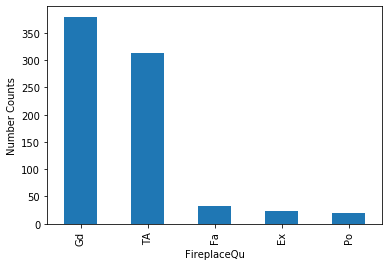

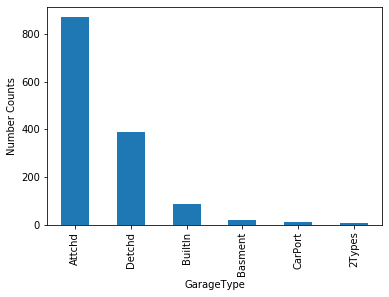

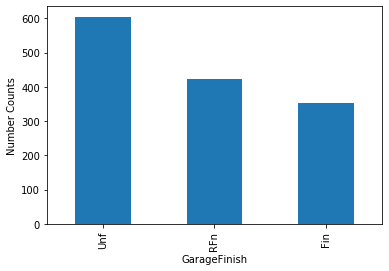

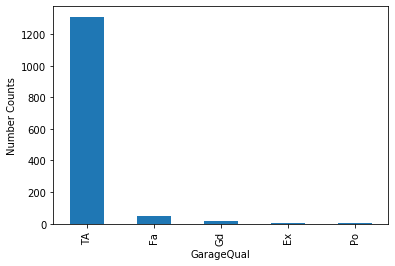

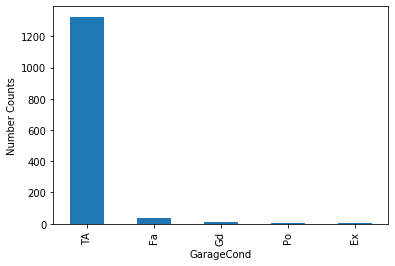

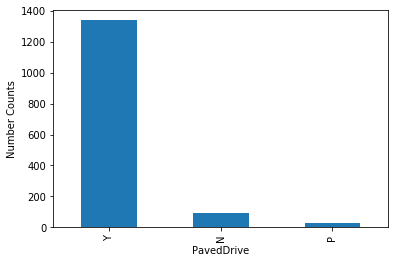

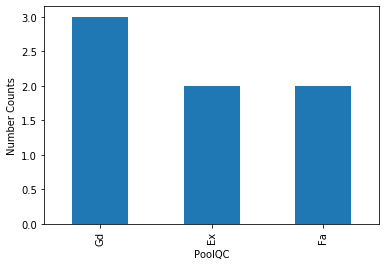

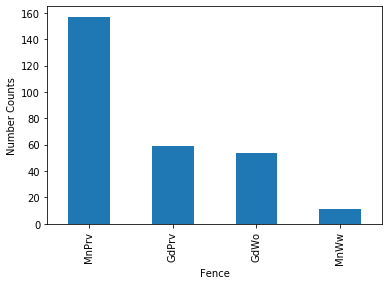

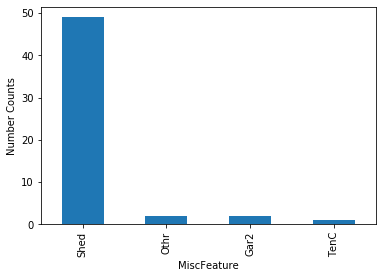

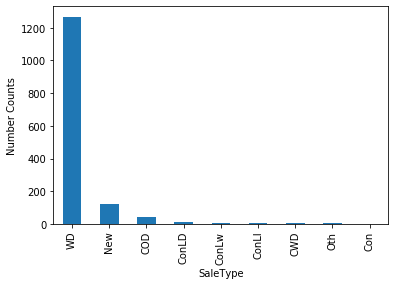

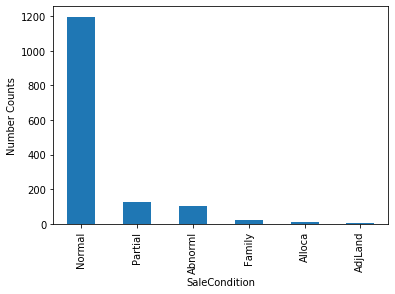

In [19]:
for cat in cat_vars:
    nunique_category(data, cat)

# Feature Engineering

In [20]:
#Seggregating the data
X = data[[col for col in data.columns if col not in ['Id','SalePrice']]]
y = data['SalePrice']

In [21]:
#Split the data to training ad testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
#Filling the missing numerical variable
num_missing_col = [col for col in missing_col if col in num_vars]

In [23]:
num_missing_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [24]:
data[num_missing_col].isnull().mean()*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [25]:
data[num_missing_col].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


As we see that  for LotFrontage and GarageYrBlt mean and median is almost same. So, we can impute either by mean or median

In [26]:
#Impute the missing value for LotFrontage
lot_val=X_train['LotFrontage'].median()
X_train['LotFrontage'].fillna(value=lot_val, inplace=True)
X_test['LotFrontage'].fillna(value=lot_val, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
#Impute the missing value for LotFrontage
garage_val = X_train['GarageYrBlt'].median()
X_train['GarageYrBlt'].fillna(value=garage_val, inplace=True)
X_test['GarageYrBlt'].fillna(value=garage_val, inplace=True)

In [28]:
#Impute Random Sample for MasVnrArea
impute_num = RandomSampleImputer(random_state=['MasVnrArea'], variables='MasVnrArea', seed='observation')
impute_num.fit(X_train)

RandomSampleImputer(random_state=['MasVnrArea'], seed='observation',
                    variables=['MasVnrArea'])

In [29]:
X_train = impute_num.transform(X_train)
X_test = impute_num.transform(X_test)

In [31]:
#Filling the missing categorical columns
missing_cat = [col for col in missing_col if col in cat_vars]
missing_cat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
data[missing_cat].isnull().mean()*100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

As Alley, PoolQC, MiscFeature has more than 90% missing observation. So, we can drop it

In [33]:
#Drop the Alley, PoolQC, MiscFeature  column
X_train.drop(labels=['Alley', 'PoolQC', 'MiscFeature'], inplace=True, axis=1)
X_test.drop(labels=['Alley', 'PoolQC', 'MiscFeature'], inplace=True, axis=1)

In [34]:
data[missing_cat].describe()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,91,1452,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379,7,281,54
unique,2,4,4,4,4,6,6,5,5,6,3,5,5,3,4,4
top,Grvl,None,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,Gd,MnPrv,Shed
freq,50,864,649,1311,953,430,1256,1334,380,870,605,1311,1326,3,157,49


As 'MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtFinType2','BsmtExposure','BsmtFinType1' has very less missing observation aSo we can impute it by random Sample.

In [36]:
variable_rsample = [col for col in missing_cat if data[col].isnull().mean()*100 < 3]
variable_rsample

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [37]:
#Impute the Random Sample for 'MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtFinType2',
#'BsmtExposure','BsmtFinType1'
impute_cat_r = RandomSampleImputer(variables=variable_rsample,
                                random_state=['MasVnrArea'],
                                seed='observation')

In [38]:
X_train = impute_cat_r.fit_transform(X_train)
X_test = impute_cat_r.transform(X_test)

As 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence' have more than 3% of missing data. So we can we indicate fill missing value by term 'Missing' over here.

In [39]:
variable_mcat = [col for col in missing_cat if data[col].isnull().mean()*100 > 3 if col not in 
                 ['Alley', 'PoolQC', 'MiscFeature']]

In [40]:
#Impute the 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence' missing variable by term 
#'Missing'

impute_cat_m = CategoricalVariableImputer(variables=variable_mcat)
impute_cat_m.fit(X_train)

CategoricalVariableImputer(variables=['FireplaceQu', 'GarageType',
                                      'GarageFinish', 'GarageQual',
                                      'GarageCond', 'Fence'])

In [41]:
X_train = impute_cat_m.transform(X_train)
X_test = impute_cat_m.transform(X_test)

In [42]:
num_vars.pop()

'SalePrice'

In [43]:
#Variable Transformation
vt  = PowerTransformer(variables=num_vars)
vt.fit(X_train,y_train)

PowerTransformer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                            'OverallQual', 'OverallCond', 'YearBuilt',
                            'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                            'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                            'GarageCars', 'GarageArea', 'WoodDeckSF',
                            'OpenPorchSF', 'EnclosedPorch', ...])

In [44]:
#Transform the variable
X_train=vt.transform(X_train)
X_test=vt.transform(X_test)

# Encode the Categorical Variable

In [54]:
#categorical variables after dropping some columns
cat_vars = [var for var in cat_vars if var not in ['Alley', 'PoolQC', 'MiscFeature']]
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [46]:
#Encode the Categorical variable as 'Rare' which occurs less than 1% of the observation
rare_encoder = RareLabelCategoricalEncoder(tol=0.01, variables=cat_vars)
rare_encoder.fit(X_train)

RareLabelCategoricalEncoder(tol=0.01,
                            variables=['MSZoning', 'Street', 'LotShape',
                                       'LandContour', 'Utilities', 'LotConfig',
                                       'LandSlope', 'Neighborhood',
                                       'Condition1', 'Condition2', 'BldgType',
                                       'HouseStyle', 'RoofStyle', 'RoofMatl',
                                       'Exterior1st', 'Exterior2nd',
                                       'MasVnrType', 'ExterQual', 'ExterCond',
                                       'Foundation', 'BsmtQual', 'BsmtCond',
                                       'BsmtExposure', 'BsmtFinType1',
                                       'BsmtFinType2', 'Heating', 'HeatingQC',
                                       'CentralAir', 'Electrical',
                                       'KitchenQual', ...])

In [47]:
#transform the variable
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

In [48]:
#label encode the categorical variable
onehot_encoder = OneHotCategoricalEncoder(variables=cat_vars,drop_last=True)
onehot_encoder.fit(X_train,y_train)

OneHotCategoricalEncoder(drop_last=True,
                         variables=['MSZoning', 'Street', 'LotShape',
                                    'LandContour', 'Utilities', 'LotConfig',
                                    'LandSlope', 'Neighborhood', 'Condition1',
                                    'Condition2', 'BldgType', 'HouseStyle',
                                    'RoofStyle', 'RoofMatl', 'Exterior1st',
                                    'Exterior2nd', 'MasVnrType', 'ExterQual',
                                    'ExterCond', 'Foundation', 'BsmtQual',
                                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                    'BsmtFinType2', 'Heating', 'HeatingQC',
                                    'CentralAir', 'Electrical', 'KitchenQual', ...])

In [49]:
#Transform the variable
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# Model Building

In [50]:
#Fitting the DecisionTree model
for d in range(2,7):
    dtree = DecisionTreeRegressor(max_depth=d)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(np.nan_to_num(X_test))
    print(f' For {d} depth  score for training  is {r2_score(y_train,dtree.predict(X_train))} and score for testing is {r2_score(y_test,y_pred)}')

 For 2 depth  score for training  is 0.6333186422324575 and score for testing is 0.6320350278408924
 For 3 depth  score for training  is 0.7354693234166244 and score for testing is 0.7604721025051391
 For 4 depth  score for training  is 0.806984202751024 and score for testing is 0.7271844507348363
 For 5 depth  score for training  is 0.8704091546893036 and score for testing is 0.7710662169441442
 For 6 depth  score for training  is 0.9177425203831024 and score for testing is 0.7927386577322396


In [51]:
#Fitting the RandomForest model
for n in [100,200,300,400,500,600,700]:
    rforest = RandomForestRegressor(n_estimators=n, max_depth=4)
    rforest.fit(X_train,y_train)
    y_pred = rforest.predict(np.nan_to_num(X_test))
    print(f' For {n} tree score for training  is {r2_score(y_train,rforest.predict(X_train))} and score for testing is {r2_score(y_test,y_pred)}')

 For 100 tree score for training  is 0.867238790157403 and score for testing is 0.8405758651784729
 For 200 tree score for training  is 0.8671288232156075 and score for testing is 0.8402353850321906
 For 300 tree score for training  is 0.8679759629978197 and score for testing is 0.8427687350833255
 For 400 tree score for training  is 0.8677673740735239 and score for testing is 0.8397620985619609
 For 500 tree score for training  is 0.8674197336587766 and score for testing is 0.8405780044707667
 For 600 tree score for training  is 0.866042692333036 and score for testing is 0.842081296427202
 For 700 tree score for training  is 0.8679720859770361 and score for testing is 0.8400477630625895


In [52]:
#Fitting the Ridge model
for a in [0.1,1.0,2.0,3.0,4.0]:
    lasso=Lasso(alpha=a)
    lasso.fit(X_train,y_train)
    y_pred_l = lasso.predict(np.nan_to_num(X_test))
    print(f' For alpha {a}   score for training  is {r2_score(y_train,lasso.predict(X_train))} and score for testing is {r2_score(y_test,y_pred_l)}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233133474045.77472, tolerance: 620452302.9491594
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130474641480.3526, tolerance: 620452302.9491594
  positive)


 For alpha 0.1   score for training  is 0.9233165276199454 and score for testing is 0.8884296546765048
 For alpha 1.0   score for training  is 0.9232047406115448 and score for testing is 0.888534233790964


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28236229782.332336, tolerance: 620452302.9491594
  positive)


 For alpha 2.0   score for training  is 0.9229935244797571 and score for testing is 0.8888735093346044


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4316895867.801575, tolerance: 620452302.9491594
  positive)


 For alpha 3.0   score for training  is 0.9226738059942342 and score for testing is 0.8888884607449561
 For alpha 4.0   score for training  is 0.9223741765441323 and score for testing is 0.8889262377454518


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2695725755.2244873, tolerance: 620452302.9491594
  positive)


In [53]:
#Fitting the Ridge model
for a in [4.0,5.0,6.0,7.0,8.0]:
    ridge=Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    y_pred_r = ridge.predict(np.nan_to_num(X_test))
    print(f' For alpha {a}   score for training  is {r2_score(y_train,ridge.predict(X_train))} and score for testing is {r2_score(y_test,y_pred_r)}')

 For alpha 4.0   score for training  is 0.8927838818244784 and score for testing is 0.8783555523514923
 For alpha 5.0   score for training  is 0.8909074553707942 and score for testing is 0.8796818976832047
 For alpha 6.0   score for training  is 0.8892401686923631 and score for testing is 0.8806921196301797
 For alpha 7.0   score for training  is 0.8877222043332227 and score for testing is 0.8814661634534673
 For alpha 8.0   score for training  is 0.886318229246522 and score for testing is 0.882059859451525


# In the above case Ridge Regression Performing well